*Autorska implementacja algorytmów opisanych w materiałach "Metody Optymalizacji" autorstwa Michała Lewandowskiego dostępnych pod linkiem:
http://akson.sgh.waw.pl/~mlewan1/Site/MO_files/mo_skrypt_21_12.pdf*

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# Algorytmy optymalizacji

## Algorytmy optymalizacji funkcji jednej zmiennej

### Wyróżnia się dwa podstawowe typy algorytmów:

- **Metody bezpośrednich poszukiwań (ang. direct search methods)**
Metody bezpośrednich poszukiwań wykorzystują wyłącznie wartości funckji
celu

- **Metody oparte na gradientach (ang. gradient-based methods)**
Metody oparte na gradientach wykorzystują rownież pochodne pierwszego i/lub drugiego rzędu funkcji celu. Ponieważ gradienty liczymy  numerycznie, funkcja celu nie musi być rożniczkowalna ani nawet ciągła, aby wykorzystywać metody gradientowe


Poniższe metody zakładają, że funkcja celu jest **unimodalna** (*ang. unimodal function*), czyli taka, że ma tylko jedno minimum lokalne. W praktyce, dzieli się funkcję na przedziały, w których jest ona unimodalna i dla każdego takiego przedziału z osobna, znajduje się minimum. 

### Minimum funkcji znajduje się w dwóch fazach:

1.  Metody ustalania przedziału, w którym znajduje się minimum (*ang. bracketing methods*)

2.  Metody znajdowania minimum z zadaną dokładnością:

    a) **Metody eliminowania obszarów** (*ang. region elimination methods*)

    b) **Metoda estymacji punktowej** (*ang. point estimation method*)

    b) **Metody oparte na gradientach** (*ang. gradient based methods*)

# Przykładowy wielomian:

In [2]:
def f(x):
    return -1720 + -700 * x**3 + 0.1 * x**4
    #return (x - 1) * (x + 2) * (x + 1) * (x + 20)

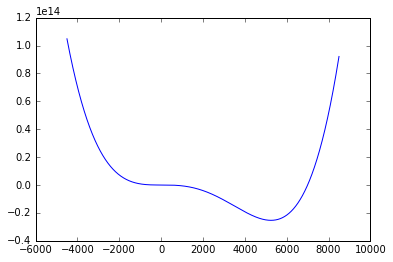

In [3]:
#a, b = -30, 20
a, b = -4500, 8500
n = 10000
x = np.linspace(a, b, num=n)
y = np.vectorize(f)
plt.plot(x, f(x))

# Metody ustalania przedziału, w którym znajduje się minimum

#### Metoda wyczerpującego poszukiwania
(*ang. exhaustive search method*)

Metoda ta polega na porównywaniu wartości funkcji celu dla punktów jednakowo
od siebie odległych. Zazwyczaj poszukiwania zaczyna się od dolnego
ograniczenia zmiennej i w pojednynczej iteracji porównuje się wartości
trzech kolejnych punktów wykorzystując założenie unimodalności.

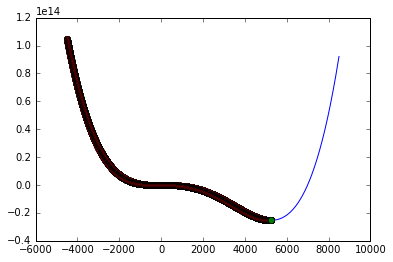

In [4]:
delta_x = (b - a) / float(n)
delta_x = 0.5
x1 = a
x2 = x1 + delta_x
x3 = x2 + delta_x

X_history = [x1, x2, x3]
    
while x3 <= b:
    X = np.array([x1, x2, x3])
    Y = f(X)
    if Y[0] >= Y[1] and Y[1] <= Y[2]:
        break
    x1, x2, x3 = x2, x3, x3 + delta_x
    
    X_history.append(x3)
    
X_history = np.array(X_history)
X = np.array(X)    
plt.plot(x, f(x))
plt.plot(X_history, f(X_history), "ro")
plt.plot(X, f(X), "go")
plt.show()



#### Metoda przyśpieszonego poszukiwania
(*ang. bounding phasemethod*)


Metoda ta polega na obraniu punktu początkowego i wybraniu kierunku poszukiwań na podstawie porównania wartości funkcji w punkcie początkowym oraz dwóch wartości funkcji w punktach będących w bezpośrednim sąsiedztwie punktu początkowego. Później znajduje się drugi kraniec przedziału stosując wykładniczą strategię poszukiwań. Poniżej użyty jest wykładnik równy 2, ale można używa˙c jakąkolwiek inną liczbę dodatnią.

Wykładnik wyższy niż 1, powoduje ’przyspieszanie’ wykładnicze poszukiwań, co zmniejsza liczbę iteracji, ale dzieje się to kosztem uzyskanej dokładności. Dla porównania w metodzie ustalania przedziału uzyskana dokładność jest lepsza, ale ilość potrzebnych iteracji jest większa.

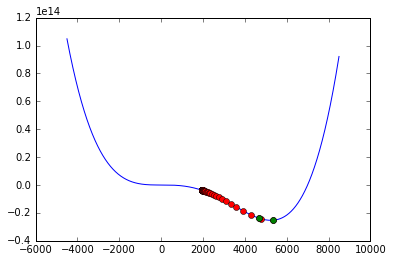

In [5]:
x0 = np.random.randint(a, b)
delta = 0.01
k = 0
A = 1.2

X = [x0]
F = [f(X[k]) + 1, f(X[k])]

while F[-1] < F[-2]:
    if f(X[k] - abs(delta)) >= f(X[k]) and f(X[k]) >= f(X[k] + abs(delta)):
        delta = abs(delta)
    elif f(X[k] - abs(delta)) <= f(X[k]) and f(X[k]) <= f(X[k] + abs(delta)):
        delta = -abs(delta)

    X.append(X[k] + A**k * delta)
    k += 1
    F.append(f(X[k]))
X = np.array(X)

plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.plot(X[-2:], f(X[-2:]), "go")
plt.show()

## Metody znajdowania minimum z zadaną dokładnością
### Metody eliminowania obszarów

Rozważmy dwa punkty $x_1$ i $x_2$, które leżą w przedziale (a, b) oraz $x_1$ < $x_2$. Dla problemu minimalizacji funkcji unimodalnej, można wyciągnąć następujące wnioski:

- Jeśli $f(x_1)$ > $f(x_2)$, to minimum nie leży w $(a, x_1)$

- Jeśli $f(x_1)$ < $f(x_2)$, to minimum nie leży w $(x_2, b)$

- Jeśli $f(x_1) = f(x_2)$, to minimum nie leży ani w $(a, x_1)$ ani w $(x_2, b)$

Poniżej przedstawione zostaną trzy metody:

- Metoda dzielenia przedziału na połowę (*ang. interval halving method*)

- Metoda złotego podziału (*ang. golden section search*)

- Metoda liczb Fibonacciego (*ang. Fibonacci search*)

#### Metody eliminowania obszarów
Metoda ta polega na wybraniu trzech punktów jednakowo odległych od
siebie oraz od krańców przedziału oraz wyliczeniu wartości funkcji w tych punktach, w wyniku czego można wyeliminować połowę przedziału.

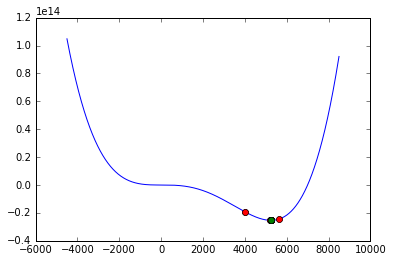

In [6]:
p = a * 2
q = b * 2
epsilon = 0.001

xm = (p + q) / 2.0
L = p - q

X = [xm]
while abs(L) > epsilon:
    x1 = p - L/4.0
    x2 = q + L/4.0
    
    if f(x1) < f(xm):
        q = xm
        xm = x1
    elif f(x2) < f(xm):
        p = xm
        xm = x2
    else:
        p = x1
        q = x2
    X.append(xm)
    L = p - q

X = np.array(X)
plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.plot(X[-2:], f(X[-2:]), "go")
plt.show()

#### Metoda złotego podziału

W metodzie tej w każdej nowej iteracji potrzeba wyliczyć tylko jedną nową wartość funkcji. Idea polega na tym, że spośród dwóch punktów,\ które potrzebne są, aby stosować regułę eliminowania obszarów, jeden punkt jest zawsze poprzednim a tylko drugi punkt jest nowy. Ponadto przedział zawęża się za każdą iteracją proporcjonalnie o tyle samo, czyli o wartość $\rho$, która spełnia następującą zależność:
$$\frac{1-\rho}{1}=\frac{\rho}{1-\rho}\implies \rho = \frac{3-\sqrt{5}}{2} \approx 0.382$$

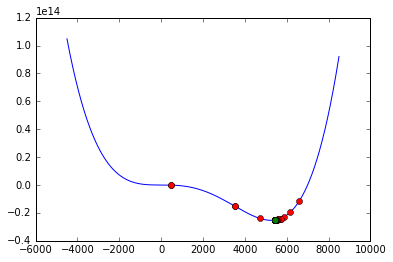

In [8]:
p = a
q = b
epsilon = 0.01
k = 1
rho = 0.382

w1 = p + (1 - rho) * (q - p)
w2 = p + rho * (q - p)
X = [w1, w2]

while abs(p - q) > epsilon:
 
    if k % 2 == 0:
        w1 = p + (1 - rho) * (q - p)
        X.append(w1)
    else:
        w2 = p + rho * (q - p)
        X.append(w2)

    if f(w1) > f(w2):
        q = w1
    elif f(w1) < f(w2):
        p = w2
    else:
        q = w1
        p = w2    
    k += 1
    
X = np.array(X)
plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.plot(X[-1], f(X[-1]), "go")
plt.show()

#### Metoda liczb Fibonacciego
W metodzie złotego podziału proporcja zmniejszania się przedziału z iteracji na iterację pozostaje niezmienna i wynosi 0.618. W metodzie liczb Fibonacciego, idea jest taka sama jak w metodzie złotego podziału, z wyjątkiem faktu, że w metodzie liczb Fibonacciego proporcja zmniejszania się przedziału z iteracji na iterację zmienia się tak, aby przedział zmniejszał się w sposób optymalny (tzn. jak najbardziej). Jeśli $\rho_k$ oznacza proporcje, o jaką zmniejsza się przedział w k-tej iteracji, to w metodzie Fibonacciego zachodzi następujący związek:

$$\frac{1-\rho_{k+1}}{1}=\frac{\rho_k}{1-\rho_k}$$

Okazuję się, że wartość $\rho_k\in(0,1/2]$, gdzie $k = 1,...,N$, które minimalizują wyrażenie $(1-\rho_1)(1-\rho_2)...(1-\rho_N)$ i które spełniają powyższy związek (1), są następujące liczby:
$$\rho_1 = 1-\frac{F_N}{F_{N+1}}$$

$$\rho_2 = 1-\frac{F_{N-1}}{F_{N}}$$
...
$$\rho_2 = 1-\frac{F_{N-k+1}}{F_{N-k+2}}$$
...
$$\rho_2 = 1-\frac{F_1}{F_2}$$
gdzie $F_k$ oznaczają liczby Fibonacciego. Liczby Fibonacciego mają następującą charakterystyke:
$F_1 = 1, F_2= 1$
$$F_k = F_{k-1} + F_{k-2}$$
gdzie $k = 3, 4,...$

In [9]:
F = {}
def fib(n):
    if n in F:
        return F[n]
    if n == 1 or n == 2:
        F[n] = 1
    else:
        F[n] = fib(n-1) + fib(n-2)
    return F[n]

In [10]:
p = a
q = b
epsilon = 0.01

N = 3
value = 1
while value > epsilon:
    value = 2.0 * (q - p) / fib(N+1)
    N+=1

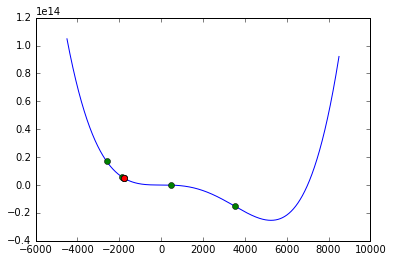

In [11]:
p = a
q = b

n = N

L = F[N-1]/float(F[N])

x1 = q - L * (q - p)
x2 = p + L * (q - p)
X = [x1, x2]

while abs(q - p) > epsilon:
    L = F[n-1]/float(F[N])
    if f(x1) < f(x2):
        q = x2
        x2 = x1
        n -= 1
        x1 = q - F[n-1]/float(F[N]) * (q - p)
        X.append(x1)
    else:
        p = x1
        x1 = x2
        n -= 1
        x2 = p - F[n-1]/float(F[N]) * (q - p)
        X.append(x2)
        

X = np.array(X)
plt.plot(x, f(x))
plt.plot(X, f(X), "go")
plt.plot(X[-1], f(X[-1]), "ro")
plt.show()

### Metody estymacji punktowej
W poprzednim podrozdziale omawiane były metody, które porównują wartości funkcji. W metodach estymacji punktowej wykorzystuje się również wielkość różnicy wartości funkcji.

#### Metoda interpolacji kwadratowej Powella
Szukamy trzy punkty $x_1 < x_2 < x_3$ takie, że wartości funkcji w tych punktach spełniają $f(x_1) > f(x_2) < f(x_3)$. Szukamy równania wielomianu kwadratowego przechodzącego przez punkty $(x_1, f(x_1)), (x_2, f(x_2))$ i $(x_3, f(x_3))$.

W tym celu zapisujemy ogólne równanie wielomianu kwadratowego przechodzącego przez punkty $x_1$ i $x_2$"

$$q(x)=a_0+a_1(x-x_1)+a_2(x-x_1)(x-x_2)$$

Następnie szukamy współczynników tego wielomianu:

$$q(x_1)=f(x_1)=a_0$$

$$q(x_2)=f(x_2)=a_0 + a_1(x_2-x_1)$$

$$q(x_3)=f(x_3)=a_0 + a_1(x_3-x_1) + a_2(x_3-x_1)(x_3-x_2)$$

Otrzymujemy układ trzech równań, który rozwiązujemy, aby znaleźć współ-
czynniki szukanego wielomianu:

$$a_0 = f(x_1)$$

$$a_1 = \frac{f(x_2)-f(x_1)}{x_2-x_1}$$

$$a_2 = \frac{1}{x_3-x_2}\bigg(\frac{f(x_3)-f(x_1}{x_3-x_1}-\frac{f(x_2)-f(x_1}{x_2-x_1}\bigg)$$

Teraz szukamy argumentu, dla którego ten wielomian kwadratowy osią-
ga minimum. Ponieważ zgodnie z naszymi założeniami $a_2 > 0$, minimum
znajduje się tam, gdzie pochodna równa jest zero.

$$q'(x)=0\implies a_1+a_2(x-x_2+x-x_1)=0\implies x^* = \frac{x_1+x_2}{2}-\frac{a_1}{2a_2}$$

W punkcie $x^*$ wielomian kwadratowy $q(x)$ osiąga minimum. Ponieważ $q(x)$ jest przybliżeniem funkcji $f(x)$, której minimum szukamy, $x^∗$ jest przybliżeniem wartości, w której funkcja $f(x)$ osiąga minimum. Spośród punktów $(x_1, x_2, x_3, x^∗)$, zatrzymujemy trzy najlepsze (innymi słowy wyrzucamy punkt, w którym wartość funkcji $f(x)$ jest największa) i ponownie dokonujemy interpolacji kwadratowej dla tych trzech punktów i szukamy minimum otrzymanego wielomianu. Procedura ta powtarzana jest do momentu, kiedy osiągnięta zostanie żądana dokładność.

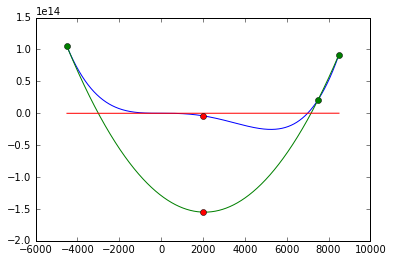

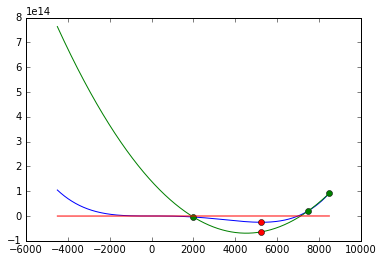

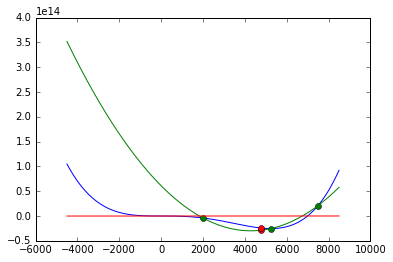

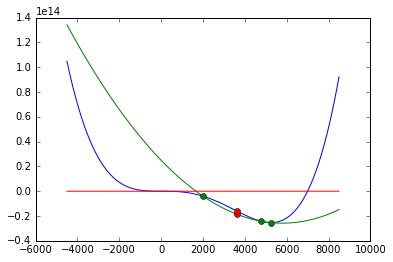

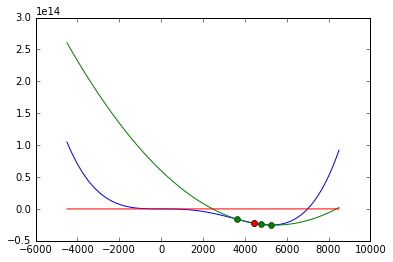

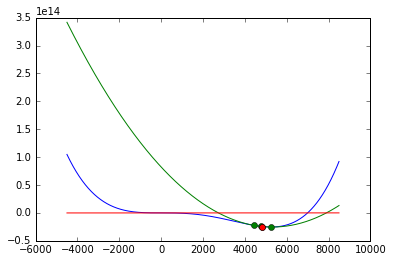

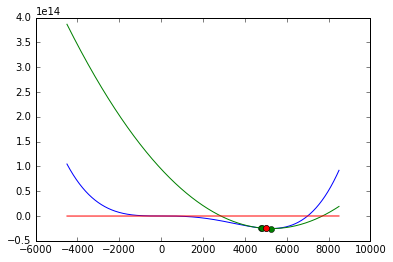

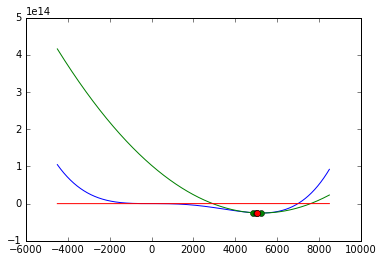

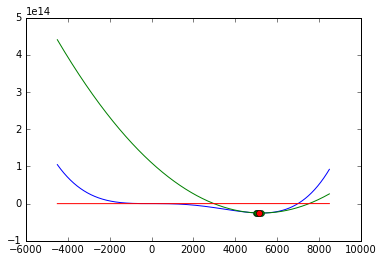

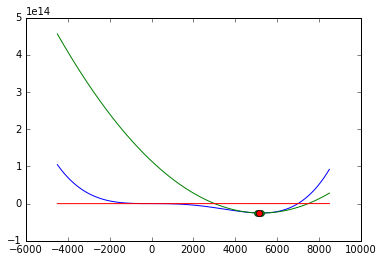

In [12]:
X = np.array([a, b-1000, b])
x2 = np.linspace(a, b, num=n)
def step(X):
    a0 = f(X[0])
    a1 = (f(X[1]) - f(X[0]))/float(X[1] - X[0])
    a2 = 1.0/(X[2] - X[1]) * ((f(X[2]) - f(X[0]))/float(X[2] - X[0]) - a1)

    xs = (X[0]+X[2])/2.0

    def q(x):
        return a0 + a1 * (x - X[0]) + a2 * (x - X[0]) * (x - X[1])
    
    def q2(x):
        return a1 + a2 * (x - X[1] + x - X[0])
   
    X = np.array(X)
    plt.plot(x, f(x))
    plt.plot(X, f(X), "go")
    plt.plot(x, q(x))
    plt.plot(x, q2(x))
    plt.plot(xs, q(xs), "ro")
    plt.plot(xs, f(xs), "ro")
    plt.show()
    
    variables = [X[0], X[1], X[2], xs]
    values = [f(a) for a in variables]
    index = values.index(max(values))
    variables.pop(index)
    return sorted(variables)

for _ in range(10):
    X = step(X)

### Metody oparte na gradientach
Metody opisane dotychczas wykorzystywały tylko wartości funkcji. Metody
oparte na gradientach wykorzystujá natomiast dodatkowo informację o pochodnych funkcji. Gradienty zazwyczaj oblicza się numerycznie. Używając metody różnic centralnych (ang. central difference method), liczymy pierwszą i drugą pochodną w punkcie $x^k$ następująco:

$$f'(x^{(k)}) = \frac{f(x^{(k)}+\Delta x^{(k)}) - f(x^{(k)}-\Delta x^{(k)})}{2 \Delta x^{(k)}}$$

$$f''(x^{(k)}) = \frac{f(x^{(k)}+\Delta x^{(k)}) - 2f(x^{(k)}) + f(x^{(k)}-\Delta x^{(k)})}{(\Delta x^{(k)})^2}$$

Parametr $\Delta x^{(k)}$ powinien być mały, na przykład może stanowić 1% wartości $x^{(k)}$.

#### Metoda Newtona-Raphsona
Załóżmy, że możemy policzyć $f(x^{(k)})$, $f'(x^{(k)})$, $f''(x^{(k)})$ w każdym punkcie pomiaru funkcji $x^{(k)}$. Możemy zdefiniować wielomian kwadratowy, którego pierwsza i druga pochodna oraz wartość w punkcie $x^{(k)}$ są identyczne z tym dla funkcji $f(x)$. Ten wielomian ma następującą postać:
$$q(x) = f(x^{(k)}) + f'(x^{(k)})(x-x^{(k)})+\frac{1}{2}f''(x^{(k)})(x-x^{(k)})^2$$

Zamiast minimalizować funkcję $f(x)$ minimalizujemy jej przybliżenie $q(x)$. Warunek pierwszego rzędu na istnienie minimum jest następujący:
$$0 = q'(x) = f'(x^{(k)})+f''(x^{(k)})(x-x^{(k)})$$
Nowy punkt $x=x^{(k+1)}$ spełnia zatem:
$$x^{(k+1)} = x^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})}$$
Metoda Newtona-Raphsona polega na kontynuowaniu powyższej procedury do momentu, w którym pochodna $f'(x^{(k+1)})$ będzie wystarczająco blisko zera. Jeśli postawimy $g(x)=f'(x)$, wtedy otrzymamy formuję do iteracyjnego poszukiwania rozwiązania równania $g(x)=0$:
$$x^{(k+1)}=x^{(k)}-\frac{g(x^{(k)})}{g'(x^{(k)})}$$
Metoda Newtona-Raphona działa dobrze jeśli $f''(x)>0$ wszędzie. Jeśli natomiast $f''(x)<0$ dla pewnego $x$, algorytm może nie zbiegać do minimum. Jeżeli zamiast analitycznych pochodnych funkcji wykorzystujemy przybliżone pochodne, wówczas algorytm nazywamy quasi-newtonowskim.

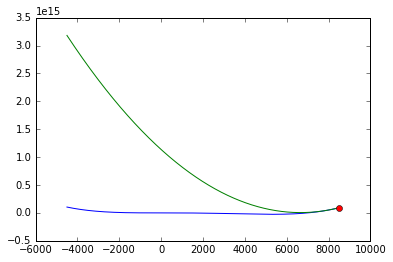

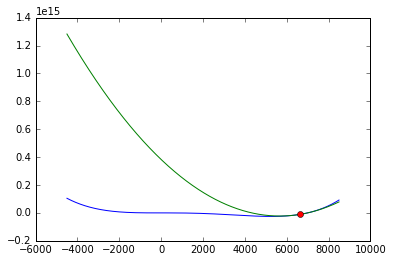

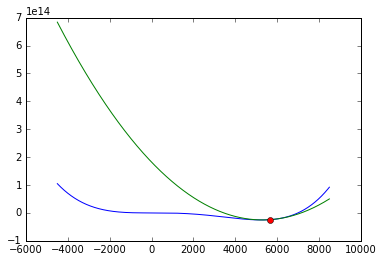

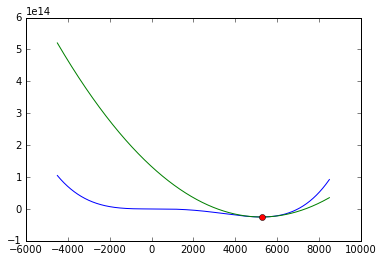

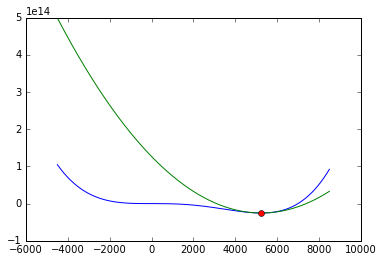

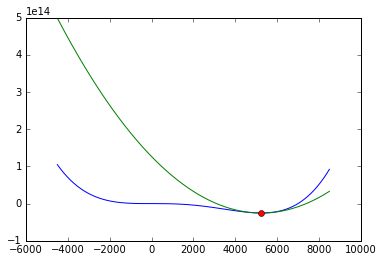

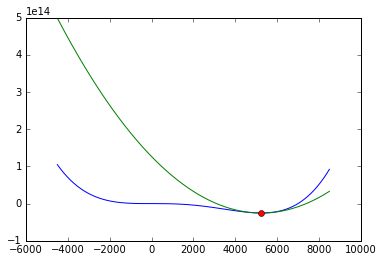

In [13]:
def get_1st_derivative(f, X, delta):
    return (f(X + delta) - f(X - delta)) / 2.0 * delta

def get_2nd_derivative(f, X, delta):
    return (f(X + delta) - 2 * f(X) + f(X - delta)) / delta ** 2

def q(x, f, xk, delta):
    A = f(xk)
    B = get_1st_derivative(f, xk, delta) * (x - xk) 
    C = 0.5 * get_2nd_derivative(f, xk, delta)  * (x - xk) ** 2
    return A + B + C


delta = 1
e = 0.1

X = b
gx = 1

while abs(gx) > e:
    plt.plot(x, f(x))
    plt.plot(x, q(x, f, X, delta))
    plt.plot(X, f(X), "ro")
    plt.show()
    gx = get_1st_derivative(f, X, delta)

    xk = X - gx/get_2nd_derivative(f, X, delta)
    X = xk



#### Metoda siecznych *(ang. secant method)*
Jest to metoda podobna do Newtona-Raphson. Zamiast $f''(x^{(k)})$, używa się nastepującego przybliżenia:
$$\frac{f'(x^{(k)})-f(x^{(k-1)})}{x^{(k)}-x^{(k-1)}}.$$

Otrzymuje się wtedy przedstawiony poniżej algorytm, który nazywany jest metodą siecznych:
$$x^{(k+1)} = x^{(k)} - \frac{x^{(k)}-x^{(k-1)}}{f'(x^{(k)})-f'(x^{(k-1)})}f'(x^{(k)})$$

Metoda siecznych wymaga dwóch punktów startowych $x^{(-1)}$ oraz $x^{(0)}$. Tak samo jak w przypadku metody Newtona-Raphsona, metodę siecznych można wykorzystać do znajdowania pierwiastków równania $g(x)=0$. Otrzymujemy wtedy algorytm:
$$x^{(k+1)} = x^{(k)}-\frac{x^{(k)}-x^{(k-1)}}{g(x^{(k)})-g(x^{(k-1)})}g(x^{(k)})$$

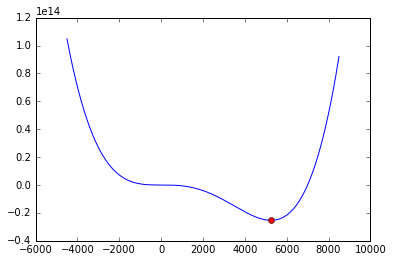

In [14]:
xk = b * 2.0
xkm1 = b * 2.0 + 1.0
e = 0.001
gxk = 1

while gxk > e:
    gxk = get_1st_derivative(f, xk, delta)
    gxm1 = get_1st_derivative(f, xkm1, delta)

    xkp1 = xk - (xk - xkm1)/(gxk - gxm1) * gxk
    
    xkm1 = xk
    xk = xkp1

X = np.array(xk)
plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.show()

### Porównanie metod znajdowania minimum z zadaną dokładnością
- Jeśli początkowy przedział, w którym leży minimum jest znany, najbardziej efektywną metodą eliminacji obszarów jest metoda liczb Fibonacciego.
- Jeśli nie znamy początkowego przedziału oraz pochodnych funkcji, wówczas najlepsza powinna być metoda iterpolacji kwadratowej Powella lub metoda quasi-newtonowska.
- Gdy pierwsze pochodne są dostępne, metoda siecznych
lub metoda interpolacji sześciennej (Jest to metoda podobna do interpolacji
kwadratowej, używa jednak pierwszych pochodnych funkcji w celu zmniejszenia ilości potrzebnych
wartości funkcji w pojedynczej iteracji.) powinna być najbardziej efektywna.
- Gdy dostępne są informacje i pierwszych i drugich pochodnych funkcji, najbardziej efektywna jest Newtona-Raphsona.

## Algorytmy optymalizacji funkcji wielu zmiennych
Dana jest funkcja wielu zmiennych: $f:I\!R^N\rightarrow I\!R$. Mówimy, że punkt $\bar{x}$ jest punktem stacjonarnym, jeśli gradient w tym punkcie jest zerowym wektorem: $\nabla f(\bar{x})=0$. Punkt ten jest lokalnym minimum, jeśli Hesjan w tym punkcie $\nabla^2 f(\bar{x})$ jest dodatnio określony. Macierz jest dodatnio określona jeśli wszystkie jej wartości własne są dodatnie: $\lambda_i>0, i=1,2,...,N^2$. W niniejszej części skryptu omówione będą następujące algorytmy minimalizacji funkcji wielu zmiennych:

- Metody bezpośrednich poszukiwań:
    - Metoda hiperseścienna (ang. evolutionary optimization)
    - Metoda sympleksowa Neldera-Meada
    - Metoda kierunków sprzężonych (ang. conjugate direction) Powella
    
- Metody gradientowe (ang. descent methods)
    - Metoda najszybszego spadku (ang steepest descent method)
    - Metoda Newtona
    - Metoda Marquardta
    - Metoda sprzężonego gradientu Fletcher-Reevesa
    - Metody quasinewtonowskie:
        - Metoda Davidon-Fletcher-Powella (DFP)
        - Metoda Broyden-Fletcher-Goldfarb-Shannona (BFGS)
        

# Przykładowy wielomian:

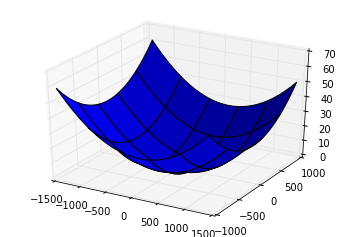

In [47]:
def f(x):
    A = 0.5 * x[0]**2 + 1.25 * x[1]**2
    B = 1.0 * (x[0]-200)**2 + 1.25 * (x[1])**2
    return 0.00001*(A+B)

xmesh, ymesh = np.mgrid[-1400:1400:50j, -1000:1000:50j]

fig = plt.figure()
ax = fig.gca(projection="3d")

fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

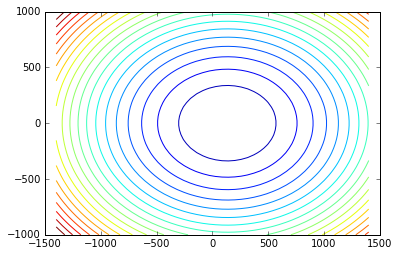

In [48]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, range(0, 60, 3))

### Metody bezpośrednich poszukiwań

Tak jak w przypadku optymalizacji funkcji jednej zmiennej metody bezpośrednich poszukiwań korzystają wyłącznie z wartości funkcji w punktach, w przeciwieństwie do metod gradientowych, które dodatkowo wykorzystują pochodne funkcji.

#### Metoda hipersześcienna
Algorytm potrzebuje w pojedyńczej iteracji 2^N+1 punktów, z czego 2^N punktów to są wierzchołki hipersześcianu scentrowanego na pozostałym punktcie. Porównnuje się wartości funkcji we wszystkich tych punktach i wskazuje się najlepszy (z najmniejszą wartością). W następnej iteracji tworzy się sześcian wokół tego najlepszego punktu. Jeśli najlepszym punktem okaże się punkt, który był środkiem danego hipersześcianu, wówczas zmniejsza się rozmiar sześcianu. Proces ten kontynuuje się aż hipersześcian stanie się dostatecznie mały.

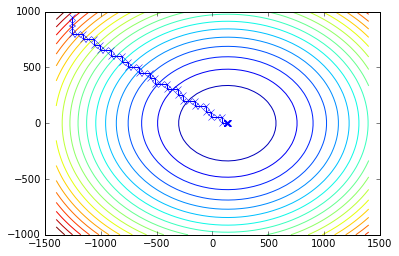

In [49]:
p, q = np.random.randint(-1500, 1500), np.random.randint(-1000, 1000)
x0 = np.array([p, q])
delta = np.array([100, 100])
e = 0.01

xk = x0

X = np.array(x0)
while np.linalg.norm(delta) > e:
    d = delta/2.0
    hsquare = np.array([
            xk,
            xk + np.array([-d[0], 0]),
            xk + np.array([d[0], 0]),
            xk + np.array([0, -d[1]]),
            xk + np.array([0, d[1]]),
        ])
    nxk = hsquare[np.argmin(f(hsquare.T))]
    if nxk[0] == xk[0] and nxk[1] == xk[1]:
        delta = d
    xk = nxk
    X = np.vstack([X, xk])

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, range(0, 60, 3))
plt.plot(X.T[0], X.T[1], "x-")

W powyższym algorytmie w każdej iteracji trzeba policzyć maksymalnie $2^N$ wartości funkcji. Czyli ilość porzebnych ewaluacji funkcji wzrasta wykładniczo wraz z N.
Jeśli algorytm znajdzie dokładne minimum funkcji w którejś iteracji, nie zatrzymuje się automatycznie. Wartość $||\Delta||$ musi spaść poniżej $\epsilon$, aby algorytm zakończył działanie.
Ustalenie dużego parametru redukcji $\Delta_i$ jest dobre, aby wtedy algorytm może potrzebować wielu iteracji a zatem i wielu ewaluacji funkcji. Z drugiej strony ustalenie małego parametru może prowadzić do zbyt wczesnej zbieżności algorytmu do suboptymalnego punktu, szczególnie w przypadku funkcji bardzo nieliniowych. Redukcja parametru nie musi być dwukrotna. Dla leprzej zbieżności algorytmu rekomenduje się redukcję mniejszą niż dwukrotną.

#### Metoda sympleksu Neldera-Meada

Sympleks wymaga dużo mniejszej ilości punków niż hipersześcian, co staje się szczególnie widoczne dla wielu wymiarów. Sympleks w N-wymiarowej przestrzeni ma N+1 wierzchołków. Jest to minimalna ilość wierzchołków umożliwiająca poszukiwanie we wszystkich możliwych kierunkach N-wymiarowej przestrzeni. Ważne jest jednak, aby sympleks nie rozpinał figury o zerowej objętości w N-wymiarowej przestrzeni - czyli na przykład dla funkcji dwuwymiarowej trzy punkty sympleksu nie mogą leżeć na jednej linii, a w przypadku funkcji trójwymiarowej cztery punkty sympleksu nie mogą leżeć na jednej płaszczyźnie.

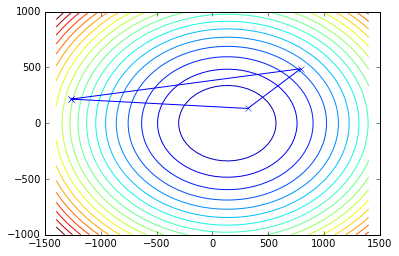

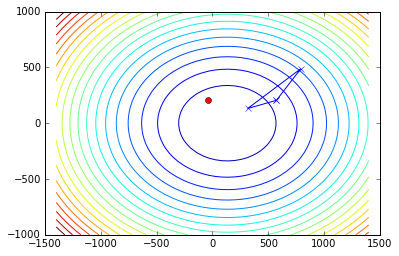

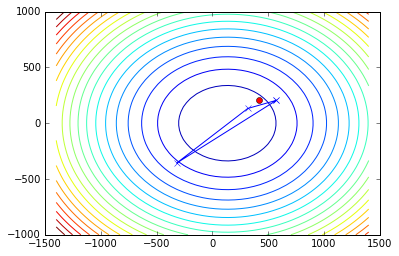

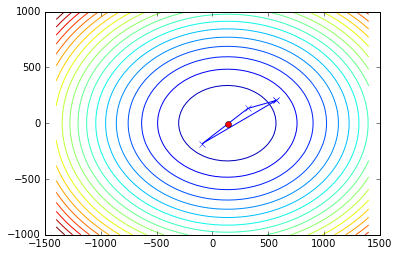

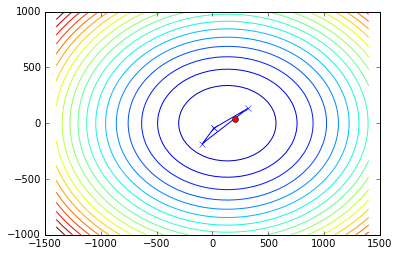

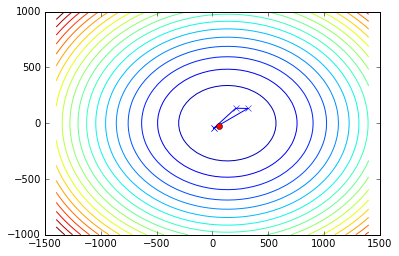

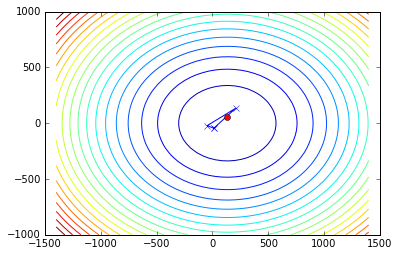

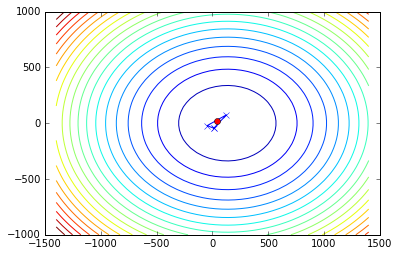

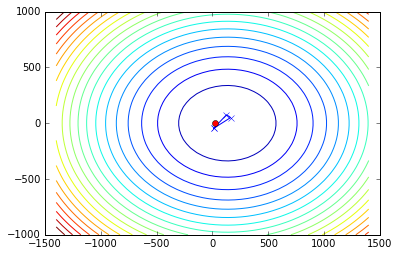

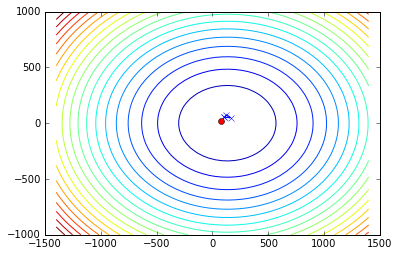

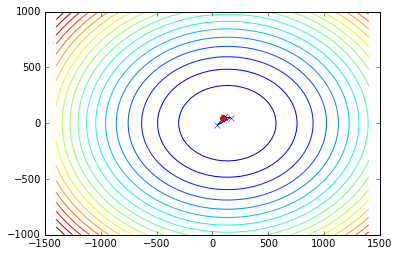

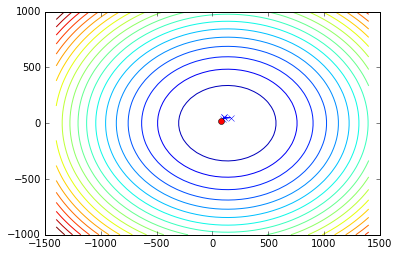

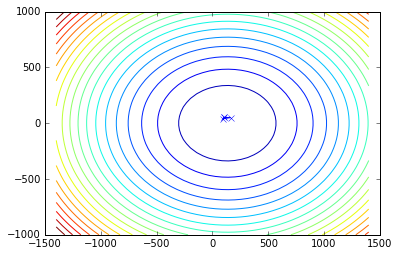

In [50]:
gamma = 2
beta = 0.5
e = 0.02

p1, q1 = np.random.randint(-1500, 1500), np.random.randint(-1000, 1000)
p2, q2 = np.random.randint(-1500, 1500), np.random.randint(-1000, 1000)
p3, q3 = np.random.randint(-1500, 1500), np.random.randint(-1000, 1000)

N = 3

sim = np.array([[p1, q1],
              [p2, q2],
              [p3, q3]])

X = np.vstack([sim, sim[0]])

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, range(0, 60, 3))
plt.plot(X.T[0], X.T[1], "x-")
plt.show()

xc = sim[0]
H = np.array(sim)
i = 0
while np.sqrt(np.sum((f(sim.T) - f(np.array([xc]*N).T)) ** 2)/(N+1)) > e:
    values = np.argsort(f(sim.T))
    xb = sim[values[0]]
    xw = sim[values[-1]]
    xm = sim[values[-2]]

    xc = np.array([np.sum(sim.T[0]), np.sum(sim.T[1])]) / (N+1)

    xr = 2 * xc - xw
    xnew = xr

    if f(xr) < f(xb):
        xnew = (1 + gamma) * xc - gamma * xw
    elif f(xr) >= f(xw):
        xnew = (1 - beta) * xc + beta * xw
    elif f(xm) < f(xr) and f(xr) < f(xw):
        xnew = (1 + beta) * xc - beta * xw

    sim[values[-1]] = xnew

   

    i += 1
    
    if i % 1 == 0:
        X = np.vstack([sim, sim[0]])

        avg = np.array([np.average(sim.T[0]), np.average(sim.T[1])])

        H = np.vstack([H, avg])

        plt.axis("equal")
        plt.contour(xmesh, ymesh, fmesh, range(0, 60, 3))
        plt.plot(X.T[0], X.T[1], "x-")
        plt.plot(xc[0], xc[1], "ro")
        plt.show()

X = np.vstack([sim, sim[0]])

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, range(0, 60, 3))
plt.plot(X.T[0], X.T[1], "x-")
plt.show()

Jednym ze sposobów sptworzenia sympleksu początkowego do pierwszego kroku algorytmu jest wybranie punktu bazowego $x^{(0)}$ oraz liczby C. Wówczas N+1 punktów sympleksu to $x^{(0)}$ oraz dla $i,j=1,2,...,N$ :

$$ x_j^{(i)}=
\begin{cases}
    x_j^{(0)}+C  \text{  if } j=i\\
    x_j^{(0)}+C\Delta  \text{ otherwise,}
\end{cases}, \text{  where} \Delta = 
\begin{cases}
    0.25 \text{       if } N=3\\
    \frac{\sqrt{N+1}-2}{N-1}  \text{ otherwise.}
\end{cases}
$$

Dla zapewnienia dobrej zbieżności algorytmu, sugeruje się ustalenie $\gamma \approx 2$ i $|\beta| \approx 0.5$.

#### Metoda kierunków sprzężonych Powella

Metoda kierunków sprzężonych Powella jest chyba najbardziej popularną metodą bezpośrednich poszukiwań. Wykorzystuje ona historię poprzednich rozwiązań, aby stworzyć nowe kierunki poszukiwań. Idea jest prosta: trzeba utworzyć N liniowo niezależnych kierunków poszukiwań i dokonać sekwencyjnie serię poszukiwań wzdłuż tych kierunków, startując za każdym razem z poprzednio znalezionych punktów.

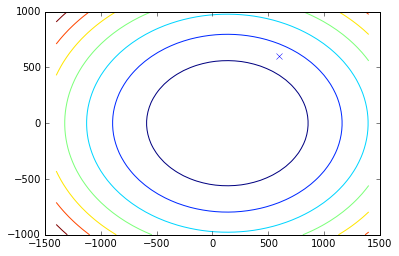

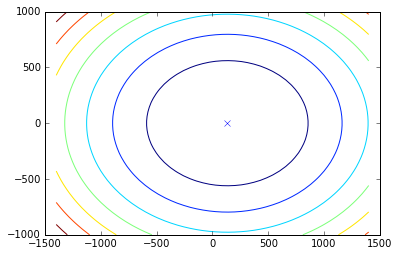

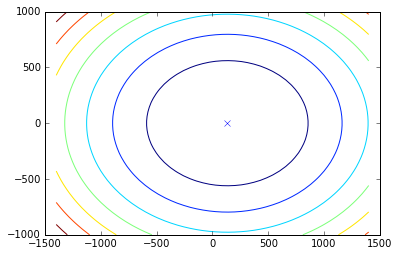

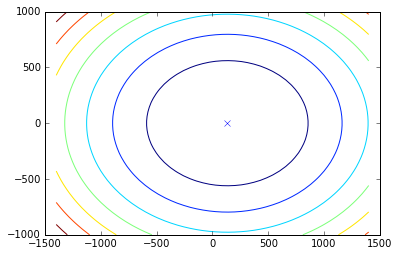

In [51]:
N = 3

delta = 10

p = 600
q = 600

x0 = np.array([p, q])

s = np.array([[1, 0], [0, 1], [1, 1]])

sc = s[0]

y0 = None

eigzeros_count = 3
dn = 11

X = np.array(x0)
plt.plot(X.T[0], X.T[1], "x-")

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)
plt.show()


def optimize_by_direction(x0, sc):

    x0_1 = x0 + sc * delta
    x0_2 = x0 - sc * delta
    while f(x0_1) < f(x0) or f(x0_2) < f(x0):

        if f(x0_1) < f(x0_2):
            x0 = x0_1
        elif f(x0_2) < f(x0):
            x0 = x0_2

        x0_1 = x0 + sc * delta
        x0_2 = x0 - sc * delta
    return x0


while dn > 10 and eigzeros_count == N:

    y0 = optimize_by_direction(x0, sc)
    x0 = y0

    for sc in s[1:]:

        x0 = optimize_by_direction(x0, sc)


        X = np.array(x0)
        plt.plot(X.T[0], X.T[1], "x-")

        plt.axis("equal")
        plt.contour(xmesh, ymesh, fmesh)
        plt.show()

    y1 = optimize_by_direction(x0, sc) 
    d = y1 - y0
    dn = np.linalg.norm(d)

    s[1:] = s[:-1]
    s[0] =  d / dn

    eigvalues, eigvectors = np.linalg.eig(np.dot(s, s.T))
    eigzeros_count = np.count_nonzero(eigvalues)
    
X = np.array(x0)
plt.plot(X.T[0], X.T[1], "x-")
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)
plt.show()


## Metody gradientowe
Gradient w punkcie $x^{(t)}$ możemy przybliżyć numerycznie za pomocą następującej formuły:
$$\nabla f(x^{(t)}) =\begin{bmatrix}
  \frac{\delta f(x^{(t)})}{\delta x_1}\\
  \frac{\delta f(x^{(t)})}{\delta x_2}\\
  ...\\
  \frac{\delta f(x^{(t)})}{\delta x_N}\\
 \end{bmatrix}, gdzie \frac{\delta f(x^{(t)})}{\delta x_i} = \frac{f_i(x^{(t)}+\delta x_i^{(t)}) - f_i(x^{(t)}-\delta x_i^{(t)})}{2 \delta x_i^{(t)}}$$

Hesjan w punkcie $x^{(t)}$ liczymy następująco:

$$\nabla f(x^{(t)}) =\begin{bmatrix}
  \frac{\delta^2 f(x^{(t)})}{\delta x_1^2} & \frac{\delta^2 f(x^{(t)})}{\delta x_1 \delta x_2} & ... & \frac{\delta^2 f(x^{(t)})}{\delta x_1 \delta x_N}\\
  \frac{\delta^2 f(x^{(t)})}{\delta x_1 \delta x_2} & \frac{\delta^2 f(x^{(t)})}{\delta x_2^2} & ... & \frac{\delta^2 f(x^{(t)})}{\delta x_2 \delta x_N}\\
  ... & ... & ... & .. \\
    \frac{\delta^2 f(x^{(t)})}{\delta x_N \delta x_1} & \frac{\delta^2 f(x^{(t)})}{\delta x_N \delta x_2} & ... & \frac{\delta^2 f(x^{(t)})}{\delta x_N^2}\\
 \end{bmatrix},$$
 
 gdzie:
 
$$\frac{\delta^2 f(x^{(t)})}{\delta x_i^2} = \frac{f_i(x^{(t)}+\delta x_i^{(t)}) - 2f(x^{(t)}) + f_i(x^{(t)}-\delta x_i^{(t)})}{(\delta x_i^{(t)})^2}$$

$$\frac{\delta^2 f(x^{(t)})}{\delta x_i \delta x_j} = \frac{\frac{\delta f(x_i^{(t)} + \delta x_i^{(t)})}{\delta x_j}-\frac{\delta f(x_i^{(t)} - \delta x_i^{(t)})}{\delta x_j}}{2 \delta x_i^{(t)}}$$

Pochodne cząstkowe w ostatnim wyrażeniu powyżej są z kolei liczone tak, jak składowe gradientu, tylko że w innym punkcie. Wyrażenie $x_i^{(t)} + \delta x_i^{(t)}$ reprezentuje wektor $(x_1^{(t)}, ..., x_i^{(t)}, ..., x_N^{(t)})^T$
Żeby policzyć gradient potrzebnyhc jest $2N$ różnych wartości funkcji. A żeby policzyć Hesjan potrzebnych jest $3N + 4 \begin{pmatrix}N\\2\\ \end{pmatrix} = 2 N^2 + N$.
Ponieważ gradient jest kierunkiem najszybszego wzrostu, minus gradient
jest kierunkiem najszybszego spadku funkcji. Kierunek poszukiwań (ang.
search direction) $d^{(t)}$ jest kierunkiem spadku w punkcie $x^{(t)}$, jeśli w otoczeniu tego punktu spełniony jest następujący warunek:

$$\nabla f(x^{(t)}) \cdotp d^{(t)} \leq 0$$

Oznacza to, że cosinus kąta między gradientem i kierunkiem poszukiwań
jest większy niż $90^o$. Kierunek $d^{(t)}$ jest kierunkiem spadku, ponieważ w wyniku rozwinięcia f wokół $x^{(t)}$ otrzymujemy:
$$ f(x^{(t+1)})=f(x^{(t)}+\alpha d^{(t)})= f(x^{(t)} + \alpha \nabla f(x^{(t)}) \cdotp d^{(t)}$$

Im niższa ujemna wartość $\nabla f(x^{(t)}) \cdotp d^{(t)}$ tym większy spadek funkcji w kierunku $d^{(t)}$.
W metodach gradientowych często w ramach pojedynczej iteracji dokonuje
się poszukiwań w danym kierunku. Jest to optymalizacja jednowymiarowa. Najpierw zapisujemy reprezentatywny punkt wzdłuż kierunku $s^{(t)}$ jako:
$$x^{(k+1)} = x^{(k)}+\alpha^{(k)} s^{(k)}$$

gdzie $\alpha^{(k)}$ jest długością kroku. Ponieważ $x^{(k)}$ i $s^{(k)}$ są znane, punkt $x^{(k+1)}$ zapisać tylko jedną zmienną. Można więc wykonać minimalizację jednowymiarową, aby otrzymać nowy punkt $x^{(k+1)}$. Następnie poszukiwania kontynuuje się wzdłuż nowego kierunku $s^{(k+1)}$ i tak dalej aż do momentu znalezienia lokalnego minimum. Jeśli metoda gradientowa jest użyta do poposzukiwań jednowymiarowych wzdłuż kierunku, minimum znajdujemy poprzez zróżniczkowanie wyrażenia $f(x^{(k+1)}) = f(x^{(k+1)}+\alpha s^{(k)})$ względem $\alpha$ i przyrównaniem do zera:
$$\nabla f(x^{(k+1)} \cdotp s^{(k)} = 0$$.

W ten sposób znajdujemy nowy punkt $x^{(k+1)}$. Okazuje się że kąt pomiędzy kierunkiem poszukiwań w k-tej iteracji i kierunkiem najszybszego spadku w nowym punkcie $\nabla f(x^{(k+1)}$ jest równy $90^o$.

#### Metoda Cauchy'ego najszybszego spadku
Kierunek poszukiwań w metodzie Cauchy’ego jest kierunkiem najszybszego
spadku:

$$s^{(k)} = -\nabla f(x^{(k)}).$$

Algorytm ten gwarantuje poprawę, to jest spadek wartości funkcji, w każdej
iteracji. Metoda najszybszego spadku działa dobrze, gdy $x^{(0)}$ jest daleko od minimum $x^*$. Jeśli bieżący punkt jest blisko minimum, zmiana gradientu jest mała, wobec następny punkt powstały w wyniku poszukiwania w jednym kierunku jest blisko punktu bieżącego.

In [52]:
def norm(a):
    return a / np.linalg.norm(a)
    
def get_1st_derivative(f, X, delta):
    return (f(X + delta) - f(X - delta)) / 2.0 * np.linalg.norm(delta)

def get_2nd_derivative_same(f, X, delta1, delta2):
    return (f(X + delta1) - 2 * f(X) + f(X - delta1)) / np.linalg.norm(delta1) ** 2

def get_2nd_derivative_part(f, X, delta1, delta2):
    A = get_1st_derivative(f, X + delta1, delta2) / np.linalg.norm(delta2)
    B = get_1st_derivative(f, X - delta1, delta2) / np.linalg.norm(delta2)
    return (A + B) / (2 * np.linalg.norm(delta2))
    

def get_gradient(f, x0, delta):
    grad = np.zeros(x0.size)
    for i in xrange(x0.size):
        delta_vect = np.zeros(x0.size)
        delta_vect[i] = delta
        grad[i] = get_1st_derivative(f, x0, delta_vect)
    return grad

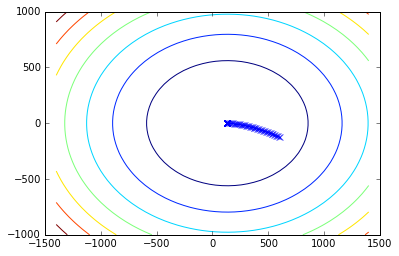

In [64]:

delta = 0.01
alpha_max = 10

e1 = 0.0001
e2 = 0.0001

L = 1000000

p, q = np.random.randint(-1500, 1500), np.random.randint(-1000, 1000)
x0 = np.array([p, q])

def get_min_cauchy(f, x0, e1, e2, M=1000):
    X = np.array(x0)
    for k in xrange(M):
        grad = get_gradient(f, x0, delta)
        if np.linalg.norm(grad) * L < e1:
            break

        alist = np.array([np.arange(1, alpha_max), np.arange(1, alpha_max)])
        xvalues = x0 - alist.T * norm(grad)
        argmin = np.argmin(f(xvalues.T))
        x1 = xvalues[argmin]

        if np.linalg.norm(x1 - x0) / np.linalg.norm(x0) <= e2:
            break

        x0 = x1
        X = np.vstack([X, x0])
    return x0, X

x0, X = get_min_cauchy(f, x0, e1, e2)

plt.plot(X.T[0], X.T[1], "x-")
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)
plt.show()


#### Metoda Newtona

Rozwinięcie w szereg Taylora drugiego rzędu funkcji $f$ wokół punktu $x^{(t)}$ przyjmuje następującą formę:
$$f(x^{(k+1)}) = f(x^{(k)})+\nabla f(x^{(k)})^T (x-x^{(k)} )+\frac{1}{2}(x-x^{(k)})^T \nabla^2 f(x^{(k)})(x-x^{(k)})$$
Jeśli policzymy warunek pierwszego rzędu na maksimum lokalne tej funkcji, otrzymujemy:
$$\nabla f(x^{(k)})+\nabla^2 f(x^{(k)})(x-x^{(k)})=0$$
Podstawiając $x^{(k+1)}=x$, otrzymujemy:
$$x^{(k+1)}=x^{(k)}-\big[\nabla^2 f(x^{(k)})\big]^{-1}\nabla f(x^{(k)})$$
Kierunek poszukiwań w metodzie Newtona jest zatem dany wyrażeniem:
$$s^{(k)}=-\big[\nabla^2 f(x^{(k)}) \big]^{-1} \nabla f(x^{(k)})$$
Jeśli macierz $\big[\nabla^2 f(x^{(k)}) \big]^{-1}$ jest półdodatnio określona, kieurnek $s^{(k)}$ jest kierunkiem spadku. Warunek drugiego rzędu optymalizacji mówi, że macierz $\nabla^2 f(x^*)$ jest dodatnio określona dla mimimum lokalnego. Można zatem założyć, że macierz $\nabla^2 f(x)$ jest dodatnio określona w otoczeniu minimum. Metoda Newtona jest więc dobra, kiedy punkt początkowy jest blisko minimum.
Algorytm jest bardzo podobny do metody najszybszego spadku. Poszukiwania prowadzone są jednak w kierunku $s^{(k)} = -\big[\nabla^2 f(x^{(k)}) \big]^{-1} \nabla f(x^{(k)})$. Możliwy warunek zakończenia optymalizacji wzdłuż kierunku wygląda następująco:
$$\big| \nabla f(x^{(k+1)}) \big[\nabla^2 f(x^{(k)}) \big]^{-1} \nabla f(x^{(k)}) \leq \epsilon_2 \big|$$.

In [54]:
def get_hessian(f, x0, delta):
    grad = np.zeros((x0.size, x0.size))
    for i in xrange(x0.size):
        for j in xrange(x0.size):
            delta_vect1 = np.zeros(x0.size)
            delta_vect1[i] = delta
            delta_vect2 = np.zeros(x0.size)
            delta_vect2[j] = delta
            if i == j:
                grad[i][j] = get_2nd_derivative_same(f, x0, delta_vect1, delta_vect2)
            else:
                grad[i][j] = get_2nd_derivative_part(f, x0, delta_vect1, delta_vect2)
    return grad

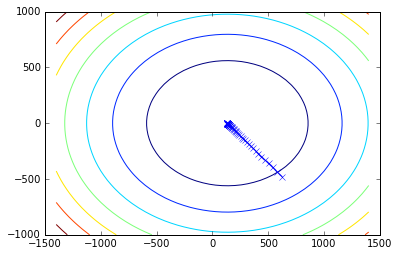

In [55]:
M = 100

delta = 0.1
alpha_max = 10

e1 = 0.01
e2 = 0.01

L = 1000000

p, q = np.random.randint(-1500, 1500), np.random.randint(-1000, 1000)
x0 = np.array([p, q])
X = np.array(x0)


for k in xrange(M):
    hess = get_hessian(f, x0, delta)
    grad = get_gradient(f, x0, delta)

    if np.linalg.norm(grad) * L < e1:
        break
        
    alist = np.array([np.arange(1, alpha_max), np.arange(1, alpha_max)])
    xvalues = x0 - alist.T * np.dot(hess ** -1, grad)
  
    argmin = np.argmin(f(xvalues.T))
    x1 = xvalues[argmin]

    grad1 = get_gradient(f, x1, delta)
    
    if abs(np.dot(grad1, np.dot(hess ** -1, grad)) * L) <= e2:
        break

    x0 = x1
    X = np.vstack([X, x0])

plt.plot(X.T[0], X.T[1], "x-")
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)
plt.show()


#### Metoda Marquardta
Metoda Cauchy'ego działa dobrze, gdy punkt początkowy jest daleko od minimum, podczas, gdy metoda Newtoda działa dobrze, gdy punkt początkowy jest blisko minimum. W metodzie Marquardta, metodę Cauchy'ego stosuje się na początku by następnie zaadopotwać metodę Newtona.

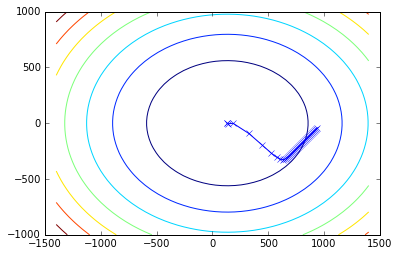

In [56]:
M = 100

delta = 1
alpha_max = 10

e1 = 100
e2 = 0.01

l0 = 100000000.0

L = 1000000

p, q = np.random.randint(-1500, 1500), np.random.randint(-1000, 1000)
x0 = np.array([p, q])
X = np.array(x0)


for k in xrange(M):
    hess = get_hessian(f, x0, delta)
    grad = get_gradient(f, x0, delta)

    if np.linalg.norm(grad) * L < e1:
        break
        
    alist = np.array([np.arange(1, alpha_max), np.arange(1, alpha_max)])

    hess_l = hess + l0 * np.identity(grad.size)

    xvalues = x0 - alist.T * np.dot(hess_l ** -1, grad)
  
    argmin = np.argmin(f(xvalues.T))
    x1 = xvalues[argmin]

    if f(x1) < f(x0):
        l0 = l0 / 2.0
    else:
        l0 = l0 * 2.0
    x0 = x1
    X = np.vstack([X, x0])

plt.plot(X.T[0], X.T[1], "x-")
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)
plt.show()


## Optymalizacja z ograniczeniami
### Teoria
Niniejszy rozdział ma służyć intuicyjnemu przedstawieniu idei twierdzenia Lagrangeá i Kuhn-Tuckera.
Dane jest następująca zadanie optymalizacyjne:
$$\smash{\displaystyle\max_{x \in D \subset {\rm I\!R}^N}} f(x)$$



Zbiór D jest zbiorem punktów dopuszczalnych. Zbiór ten będziemy przedstawiać za pomocą ograniczeń w postaci równości $h(x)=c$ oraz ograniczeń w postaci $g(x) \le c$. W przypadku ograniczeń w postaci nierówności, mówimy, że dane ograniczenie jest aktywne bądź napięte w punkcie dopuszczalnym $x$ jeśli zachodzi $g(x)=c$. W przeciwnym przypadku, tj. gdy $g(x) < c$ mówimy, że ograniczenie jest nieaktywne lub luźne w punkcie dopuszczalnym $x$. Oczywiście dla ograniczeń w postaci równości dla punktu dopuszczalnego orgraniczenie z definicji musi być napięte. Intuicję dotyczącą zagadnień optymalizacyjnych najlepiej wyrobić sobie graficznie dla przypadku, gdy $x \in {\rm I\!R}^2$.
Rysunki poniżej pokazują, że wprzypadku ograniczeń w postaci równości w punkcie optymalnym (zakładając różniczkowalność) nachylenie funkcji celu i ograniczenia powinno być równe:
<img src="optymalizacje_intuicja.png"/>

Możemy to zapisać w następujący sposób:
$$\nabla f(x^*)=\lambda \nabla h(x^*) \quad\quad(4)$$
gdzie symbol $\lambda$ oznacza mnożnik Lagrange'a.
Tak więc problem optymalizacji z ograniczeniem $max_x f(x)$, p.w. $h(x)=c)$ można sprowadzić do problemu optymalizacji bez ograniczeń funkcji $L(x,\lambda)=f(x)-\lambda (h(x)-c)$, zwanej funkcją Lagrange'a, bowiem warunki pierwszego rzędu optymalizacji tej funkcji będą dokładnie równe warunkom (4) oraz ograniczeniem $h(x^*)=c$:
$$\nabla f(x^*)-\lambda \nabla h(x^*)=0$$
$$h(x^*)-c=0$$
Z powyższych rysunków wynika również, że w przypadku ograniczeń w postaci równości mnożnik Lagrange'a może być zarówno dodatni, jak i ujemny. Jedyna wymagana rzecz jest taka, że musi on być zdefiniowany. Aby mnożnik można było zdefiniować musi być spełniony następujący warunek:
$$\nabla h(x^*)\neq0 \quad\quad(5)$$
Gradient ograniczenia w punkcie optymalnym musi być różny od wektora zerowego. W naszym przykładzie oznacza to, że:
$$\begin{bmatrix}
  \frac{\delta f(x^*)}{\delta x_1}\\
  \frac{\delta f(x^*)}{\delta x_2}
 \end{bmatrix} \neq \begin{bmatrix}  0\\
  0\\ \end{bmatrix}
  $$
  
Dla problemu optymalizacji z ograniczeniami w postaci nierówności $g(x) \leq c$ problem jest podobny, lecz nieco bardziej złożony. Jeśli optimum jest w punkcie, w którym dane ograniczenie nie jest aktywne, to warunek pierwszego rzędu jest taki sam jak, gdyby ograniczenia niebyło tj.
$$\nabla f(x^*)-\lambda g(x^*)=0$$
Aby te warunki się zgadzały, mnożnik Lagrange'a w tym przypadku musi wynosić zero.
Jeśli zaś optimum w punkcie, w którym dane ograniczenie jest aktywne, wówczas mamy do czynienia z sytuacją jak na rysunku poniżej:

<img src="optymalizacja_jeden.png"/>

W tym przypadku mnożnik Lagrange'a musi być dodatni, ponieważ w przeciwnym razie moglibyśmy przesunąć punkt $x^*$ do wewnątrz zbioru dopuszczalnego podnosząc wartość funkcji celu $f$ - co przeczyło by optymalności punktu $x^*$:

<img src="optymalizacje_dwa.png"/>

Zatem mamy dwie sytuacje możliwe w punkcie optymalnym:
- ograniczenie aktywne, mnożnik dodatni: $g(x)=c i \lambda > 0$
- ograniczenie nieaktywny, mnożnik zerowy: $g(x) < 0 i \lambda = 0$
Te dwa przypadki mozna zapisać jednym warunkiem zwanym "complementary slackness":
$$\lambda [g(x^*)-c] = 0$$
Analiza będzie podobna jeśli ograniczenia w postaci $\le$ zamieniamy na ograniczenia w postaci $\ge$. Wówczas trzeba jednak w prezentacji graficznej zmodyfikować kierunki gradientów ograniczeń:
<img src="optymalizacje_dwa_kwadraty.png"/>
W przypadku więcej niż jednego ograniczenia, zarówno jeśli chodzi o ograniczenia w postaci równości, które w punkcie optymalnym muszą być aktywne z definicji (punkt optymalny musi być punktem dopuszczalnym), jak i ograniczenia w postaci nierówności, ale które w punkcie optymalnym są aktywne, mamy doczynienia z sytuacją, jak na rysunku poniżej:

<img src="optymalizacje_gradient.png"/>

Tym razem gradient funkcji celu musi być kombinacją liniową gradientóœ ograniczeń aktywnych. W punkcie $x^*$ oba ograniczenia $g_1(x)\le c_1$ oraz $g_2(x)\le c_2$ są aktywne, a zatem w punkcie gradient funkcji celu jest kombinacją liniową obu ograniczeń. Mnożniki Lagrange'a od powiadające poszczególnym ograniczeniom występują tutaj w roli wag kombinacji liniowej. Oczywiście, aby gradient funkcji celu dało się zapisać jak kombinacje liniową gradientów ograniczeń aktywnych, te gradienty ograniczeń aktywnych powinny być liniowo niezależne. Inaczej możemy mieć doczynienia z sytuacją, jak na rysunku poniżej:
<img src="optymalizacje_ograniczenia.png"/>
Jedyny punkt dopuszczalny to punkt $x^*$, zatem jest on zarazem punktem optymalnym. Jednakże nie da się zapisać $\nabla f(x^*)$ jako liniową kombinację gradientów $\nabla g_1(x^*) i \nabla g_2(x^*)$. Liniowa niezależność gradientów wszystkich ograniczeń w postaci równości oraz aktywnych ograniczeń w postaci nierówności jest zwana warunkiem "constraint qualification".

#### Podsumowanie:
Ograniczenia mają postać:
- równości $h(x) = c$
- nierówności $g(x) \le c$, w nierównościach mówimy o:
    - ograniczeniu aktywnym (napiętym) jeżeli zachodzi również $g(x)=c$
    - ograniczeniu nieaktywnym (luźnym) jeżeli ograniczenie ma postać $g(x) < c$
    
Przykład na $x \in {\rm I\!R}^2$ z rysunku pierwszego i drugiego pokazuje, że w punkcie optymalnym nachylenie funkcji celu $\nabla f(x^*)$ i ograniczenia $\nabla h(x^*)$ powinno być równe. (Gradient ma ten sam zwrot gdy mnożnik jest dodatni, a odwrotny, gdy mnożnik jest ujemny)

Skoro nachylenia funkcji celu i ograniczenia jest równe to możemy powiedzieć, że:
$$\nabla f(x^*)=\lambda \nabla h(x^*) \quad\quad(4)$$
gdzie symbol $\lambda$ oznacza mnożnik Lagrange'a.

Po uwzględnieniu ograniczeń, problem optymalizacji z ograniczeniami można sprowadzić do optymalizacji bez ograniczeń funkcji Lagrange'a:
$L(x,\lambda)=f(x)-\lambda (h(x)-c)$.

W przypadku optymalizacji z ograniczeniem w formie nierówności aktywnej, mnożnik musi byc dodatni. W przeciwnym wypadku moglibyśmy przesunąć punkt $x^*$ do wewnątrz zbioru dopuszczalnego.

### Algorytymy
Dane są funkcje $f : {\rm I\!R}^N \rightarrow {\rm I\!R}, g_j : {\rm I\!R}^N \rightarrow {\rm I\!R}$, gdzie $j=1,...,J$ oraz $h_k:{\rm I\!R}^N \rightarrow {\rm I\!R}$, gdzie $k=1,...,K$. Ogólny problem optymalizacyjny w niniejszej części następujący:
$$\smash{\displaystyle\min_{x}} f(x)$$



przy warunkach:
$$g_j(x)\ge 0, \quad j=1,...J;\\
  h_k(x)=0, \quad k=1,...,K;$$
  
Funkcja Lagrange'a dla powyższego problemu ma postać:
$$L(x,u,v)=f(x)-\sum_{j=1}^{J} u_j g_j(x) - \sum_{k=1}^{K} v_j h_j(x)$$

Warunki Kuhn-Tuckera zapisujemy następująco:
$$\nabla f(x)-\sum_{j=1}^{J} u_j g_j(x) - \sum_{k=1}^{K} v_j h_j(x)=0\\\\
g_j(x)\ge 0, \quad j=1,...,J;\\
h_k(x)=0, \quad k=1,...,K;\\
u_j g_j(x) = 0, \quad j=1,...,J;\\
u_j\ge 0, \quad j=1,...,J.$$

Możemy teraz zapisać twierdzenie Kuhn-Tuckera o warunkach koniecznych istnienia optimum.

** *Twierdzenie* ** *Dla problemu zadanego powyżej, niech $f$, $g_j$ oraz $h_k$ będą różniczkowalne $a$ punktu $x^*$ punktem dozwolonym. Niech $I(x^*)={j:g_j(x^*)=0}$ oznacza zbiór aktywnych ograniczeń w postaci nierówności. Niech $\nabla g_j(x^*)$ dla $j \in I$ oraz $\nabla h_k(x^*)$, dla $k=1,...,K$ będą liniowo niezależne ("constraint qualification"). Jeśli $x^*$ jest optymalnym rowiązaniem problemu, wówczas istnieje wektor mnożników Lagrange'a $(u^*, v^*)$, taki że $(x^*, u^*, v^*)$ spełnia warunki Kuhn-Tuckera. *

Warunek "constraint qualification" oznacza, że gradienty wszystkich ograniczeń aktywnych w dozwolonym punkcie są liniowo niezależne (Ograniczenia w postaci równości są aktywne z definicji dla punktu dopuszczalnego, a spośród pozostałych ograniczeń - tych w postaci nierówności - aktywne są tylko te ze zbioru
$I(x^∗)$.)
Zatem każdy optymalny punkt musi spełniać warunki Kuhn-Tuckera, ale nie każdy punkt który, spełnia warunki Kuhn-Tuckera jest optymalny. Jeśli chodzi o punkty, które nie spełniają "constraint qualification", nic się nie da o nich powiedzieć - mogą być optymalne i mogą nie być optymalne.

#### Metoda funkcji kar i barier

Algorytm funkcji kar i barier polega na sprowadzeniu problemu optymalnego z ograniczeniami do serii problemów optymalizacyji bez ograniczeń. Dla różnych parametrów funkcji kar i barier wykonuje się wielokrotnie optymalizację funkcji bez ograniczeń, która dana jest następującym wzorem:
$$P(x, R)=f(x)+\Omega(R, g(x), h(x))$$

gdzie R jest zbiorem parametrów kary a $\Omega$ jest funkcją kary, która faworyzuje selekcję punktów dopuszczalnych nad punkty niedopuszczalne. Używa się różnych funkcji kary dla ograniczeń w postaci równości i dla ograniczeń w postaci nierówności. Dodatkowo niektóre funkcje $\Omega$ nakładają karę tylko na punkty niedozwolone (wówczas nazywają się funkcjami kary lub funkcjami kary zewnętrznej) a niektóre funkcje nie potrafią w ogóle radzić sobie z punktami niedopuszczalnymi i nakładają karę na punkty dozwolone, jeśli są blisko granicy ograniczenia (nazywają się wówczas funkcją bariery lub wewnętrzną funkcją kary). Poniżej przedstawiona będzie jedna wersja metody kar i barier, w której będziemy zajmować się wyłącznie ograniczeniami w postaci nierówności i funkcja kary będzie następującej postaci:
$$\Omega = R\langle g(x) \rangle^2$$
$$gdzie \langle g(x) \rangle =  \Bigg \{ \begin{matrix} 
g(x), \quad jeśli \quad g(x)<0 \\ 
0, \quad jeśli \quad g(x) \ge 0
\end{matrix}$$
Na początku optymalizuje się $f(x)+\Omega$ dla małej wartości R, następnie sukcesywnie zwiksza się wartość R i znowu optymalizuje metodami optymalizacji bez ograniczeń dla nowych wartości R. Poniżej znajduje się algorytm:

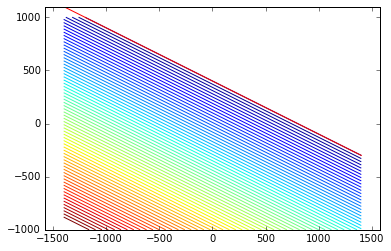

In [145]:
def g(x):
    return -0.05 * x[0] + -0.1 * x[1] + 40

def gg(x):
    return -0.5 * x + 400 

xmesh, ymesh = np.mgrid[-1400:1400:50j, -1000:1000:50j]

out = np.zeros((100, 2))

out[:, 0] = np.linspace(-1400, 1400, num=100)
out[:, 1] = gg(np.linspace(-1400, 1400, num=100))

f2mesh = g(np.array([xmesh, ymesh]))

plt.plot(out.T[0], out.T[1], "r-")
plt.axis("equal")
plt.contour(xmesh, ymesh, f2mesh, range(0, 200, 3))

In [146]:


def get_min_cauchy(f, x0, e1, e2, M=1000):
    X = np.array(x0)
    for k in xrange(M):
        grad = get_gradient(f, x0, delta)
        if np.linalg.norm(grad) * L < e1:
            break

        alist = np.array([np.arange(1, alpha_max), np.arange(1, alpha_max)])
        xvalues = x0 - alist.T * norm(grad)

        argmin = np.argmin(f(xvalues.T))
        x1 = xvalues[argmin]

        if np.linalg.norm(x1 - x0) / np.linalg.norm(x0) <= e2:
            break

        x0 = x1
        X = np.vstack([X, x0])
    return x0, X



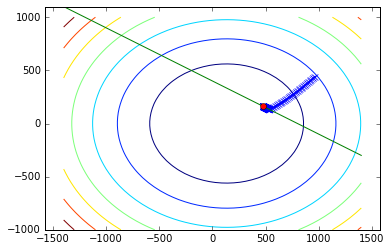

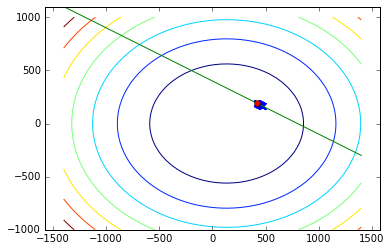

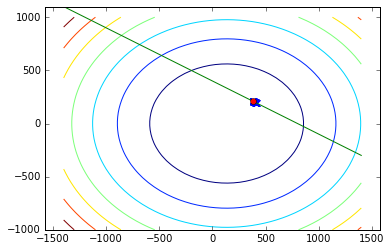

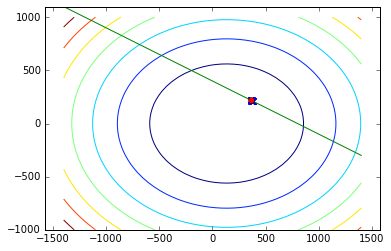

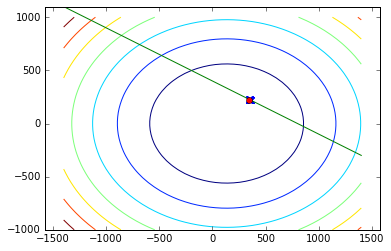

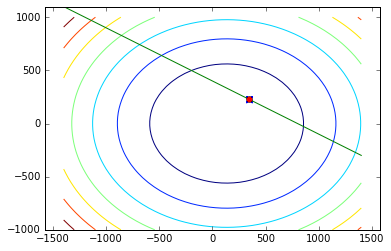

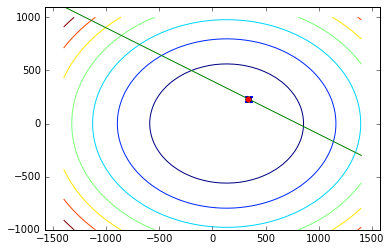

In [189]:
e1 = 0.0000001
e2 = 0.001

K = 2
c = 1.1
t = 0

p = np.random.randint(-1500, 1500)
q = np.random.randint(gg(p), 1000)

x0 = np.array([p, q])

last_value = None
for t in xrange(10):
    X = np.array(x0)


    def RBase(x0):
        if g(x0) > 0:
            return g(x0)
        else:
            return 0

    def R(x0):
        if len(x0.shape) == 2:
            result = []
            for xx in x0.T:
                result.append(RBase(xx))
            return np.array(result)
        else:
            return RBase(x0)
        return 0


    def P(x0):
        return f(x0) + K * R(x0) ** 2

    x0, X1 = get_min_cauchy(P, x0, e1, e2, 200)

    K *= c
    
    if last_value:
        if abs(P(x0) - last_value) <= e2:
            break
        
    last_value = P(x0)
    
    plt.plot(X1.T[0], X1.T[1], "bx-")
    plt.plot(out.T[0], out.T[1], "g-")
    plt.plot(x0[0], x0[1], "ro")
    plt.axis("equal")
    plt.contour(xmesh, ymesh, fmesh)
    plt.show()